# Trabajo Practico de Fundamentos de Data Science


#### Introducción
El objetivo del trabajo práctico es que el alumno tenga la experiencia de construir una solución a un problema utilizando técnicas de Machine Learning.
Durante el desarrollo de este deberá trabajar en equipo y aplicar las técnicas aprendidas en clase para entrenar un modelo.
Se espera que el alumno pueda aplicar las técnicas relacionadas con cada etapa de la consturcción deun modelo de Machine Learning.

#### Objetivos
* Elegir un problema a resolver utilizando técnicas dde Machine Learning.
* Obtener y modelar los datos necesarios para resolver el problema
* Entrenar y aplicar (predecir) un modelo de Machine Learning
* Explicar cuál sería el beneficio de aplicar la solución basada en Machine Learning.

#### Desarrollo
Para el desarrollo del trabajo práctico el grupo de alumnos deberá elegir uno de los conjuntos de datos disponibles
* Canciones de spotify (Clasificación)
* Satisfacción den vuelos de aerolineas (Clasificación)
* Precios de viviendas (Regresión)

Una vez definido el conjunto de datos para trabajar se deberán presetnar los siguientes documentos
1. EDA (Análisis Exploratorio de Datos). Puede presentarse en formato Jupyter Notebooks y debe tener conclusiones de los análisis realizados.
2. Baseline, predicción sin modelos, sólo con percepción luego del análisis.
3. Jupyter notebook de pre-procesamineto de los datos. En este fragmento de código deben estar las transformaciones realizadas a los datos hechas previamente al entrenamiento del modelo.
4. Jupyter notebook de entrenamiento de modelos. Se deben entrenar al menos 3 algoritmos diferentes y se debe elegir y justificar cuál debería ser el mdelo utilizado en producción.
5. Presentación final de resultados. Se espera una presentación que compare la resolución del problema utilizando el modelo de una solución sin la utilización de éste enfoque.

# Segundo Checkpoint

Fecha: 16 jun 2022

Los grupos deberán presentar en no más de 20 minutos lo realizado en el código hasta la fecha. Se espera ver:
* Transformación de variables categóricas a numéricas
* Separación de conjuntos de datos en entrenamiento y evaluación
* Evaluación del baseline
* Entrenamiento y evaluación de al menos un modelo de Machine Learning.

No es obligatorio tener el trabajo terminado, pero sí diagramado (el esqueleto/template) lo que aún no esté hecho. Es el último checkpoint previo a la presentación final, por lo cual se evacuarán dudas.

# Desarrollo del Segundo Checkpoint

-----------------------
## EDA
Requerido:
* Distribuciones de las variables
* Análisis/imputación de valores nulos
* Análisis valores extremos (Outliers)
* Relación de features con el target
Deseable:
* Correlación entre variables

In [ ]:
# Libreria de manejo de datos
import pandas as pd

# Librerias de visualizaciñon
import matplotlib.pyplot as plt
import seaborn as sns

#Librería Númerico
import numpy as np


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
invistico_Airline = pd.read_csv('Invistico_Airline.csv', sep=',')

# replacing values column: satisfaction
# 0=dissatisfied, 1=satisfied
invistico_Airline['satisfaction'].replace(['dissatisfied', 'satisfied'],
                        [0, 1], inplace=True)

In [ ]:
# replacing values column: Gender
# 0=Female, 1=Male
invistico_Airline['Gender'].replace(['Female', 'Male'],
                        [0, 1], inplace=True)

# replacing values column: Customer Type
# 0=Loyal Customer, 1=disloyal Customer
invistico_Airline['Customer Type'].replace(['Loyal Customer', 'disloyal Customer'],
                        [0, 1], inplace=True)

# replacing values column: Customer Type
# 0=Business travel, 1=Personal Travel
invistico_Airline['Type of Travel'].replace(['Business travel', 'Personal Travel'],
                        [0, 1], inplace=True)

In [ ]:
invistico_Airline.rename(columns = {'Departure Delay in Minutes':'demoraSalida', 'Arrival Delay in Minutes':'demoraLlegada'}, inplace = True)

In [ ]:
invistico_Airline.head()

In [ ]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(invistico_Airline.Class, prefix='Class')
 
#Business, Eco, Eco Plus
    
# Concatenate the dummies to original dataframe
merged = pd.concat([invistico_Airline, dummies], axis='columns')
 
# drop the values
merged = merged.drop(['Class'], axis='columns')

merged.head()

In [ ]:
invistico_Airline['Tiene Demora'] = invistico_Airline['Departure Delay in Minutes'].apply(lambda value: 'low' 
                                                              if value <= 15 else 'medium' 
                                                                  if value <= 60 else 'high')

In [ ]:
invistico_Airline.head()

In [ ]:
#Ver columnas con valores nulos
nan_values = invistico_Airline.isna()
nan_columns = nan_values.any()

columns_with_nan = invistico_Airline.columns[nan_columns].tolist()
print(columns_with_nan)

In [ ]:
#my_df = invistico_Airline[~invistico_Airline['Arrival Delay in Minutes'].isnull()]
my_df = invistico_Airline[invistico_Airline['Arrival Delay in Minutes'].isnull()]
my_df.shape
#my_df

In [ ]:
#Ver los primeros registros
invistico_Airline.head()

In [ ]:
# Ver las columnas
invistico_Airline.columns

In [ ]:
# Ver las dimensiones del dataset
invistico_Airline.shape

In [ ]:
#¿Hay valores nulos en los datos?
invistico_Airline.info()

In [ ]:
invistico_Airline['Arrival Delay in Minutes'].describe()

In [ ]:
#Como se distribuyen las variables numéricas
invistico_Airline.describe()

In [ ]:
invistico_Airline.median()

In [ ]:
#Como se comportan las variables categóricas
invistico_Airline.describe(include=['O'])

In [ ]:
invistico_Airline['satisfaction'].describe()
invistico_Airline['Departure Delay in Minutes'].describe()
invistico_Airline['Arrival Delay in Minutes'].describe()
invistico_Airline.groupby(['satisfaction']).count()['Age']
invistico_Airline.groupby(['satisfaction', 'Gender']).count()['Age']


In [ ]:
grouped_gender = invistico_Airline.groupby(['satisfaction', 'Gender']).count()['Age']
print(grouped_gender)
(grouped_gender.unstack(level=0).plot.bar())
plt.show()

In [ ]:
grouped_gender = invistico_Airline.groupby(['satisfaction', 'Tiene Demora', 'Customer Type', 'Type of Travel', 'Class', 'Gender']).count()['Age']
#grouped_gender = invistico_Airline.groupby(['satisfaction', 'Tiene Demora']).count()['Age']
print(grouped_gender.unstack(level=0))
(grouped_gender.unstack(level=0).plot.bar(figsize=(15, 10)))
plt.show()

In [ ]:
media_satisfaccion = invistico_Airline.groupby(['Customer Type', 'Type of Travel', 'Class', 'Gender']).satisfaction.describe()
#print(media_satisfaccion.unstack(level=0))
media_satisfaccion.sort_values(by=['mean'], inplace=True, ascending=False)
media_satisfaccion

#subset_attributes = ['Customer Type', 'Type of Travel', 'Class', 'Gender']


#print(media_satisfaccion)

#(m.unstack(level=0).plot.bar(figsize=(15, 10)))
#plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(14, 8))
#corr = reg_con_demora.corr()
corr = invistico_Airline.corr()
satisfaction_corr = corr[['satisfaction']]
#hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
hm = sns.heatmap(round(satisfaction_corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlación de atributos con la variable de respuesta "Satisfacción"', fontsize=14)

In [ ]:
f, ax = plt.subplots(figsize=(14, 8))
corr = reg_con_demora.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlación entre atributos de las encuestas de vuelos', fontsize=14)

In [ ]:
reg_con_demora.groupby(['satisfaction', 'Tiene Demora']).count()['Age']

In [ ]:
#Departure Delay in Minutes
#Arrival Delay in Minutes  
reg_con_demora = invistico_Airline.query("demoraSalida > 0")
reg_con_demora.shape

In [ ]:
#relacion entre Gender (Género) y satisfaction (Satisfacción)
#relación entre Customer Type (Tipo de cliente) y satisfaction (Satisfacción)
#relación entre Age (Edad) y satisfaction (Satisfacción)
#relación entre Type of Travel (Tipo de viaje) y satisfaction (Satisfacción)
#relación entre Class (Clase) y satisfaction (Satisfacción)
sns.lmplot(x='Age', y='satisfaction', data=invistico_Airline, aspect=1.45, scatter_kws={'alpha':0.2})

In [ ]:
#pd.crosstab(invistico_Airline['Gender'], invistico_Airline['satisfaction'], margins = 1)
#pd.crosstab(invistico_Airline['Class'], invistico_Airline['satisfaction'], margins = 1)
#pd.crosstab(invistico_Airline['Customer Type'], invistico_Airline['satisfaction'], margins = 1)
pd.crosstab(invistico_Airline['Type of Travel'], invistico_Airline['satisfaction'], margins = 1)

In [ ]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Distribución de la edad en los vuelos", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Age")
ax1.set_ylabel("Densidad") 
sns.kdeplot(invistico_Airline['Age'], ax=ax1, shade=True, color='steelblue')

In [ ]:
#subset_attributes = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location'
#                     , 'Inflight wifi service', 'Inflight entertainment', 'Online support','Ease of Online booking'
#                     , 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
subset_attributes = ['Inflight entertainment', 'Ease of Online booking', 'Online support', 'On-board service'
                    , 'Online boarding']
ls = round(invistico_Airline[invistico_Airline['Class'] == 'Business'][subset_attributes].describe(),2)
ms = round(invistico_Airline[invistico_Airline['Class'] == 'Eco'][subset_attributes].describe(),2)
hs = round(invistico_Airline[invistico_Airline['Class'] == 'Eco Plus'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Business', 'Eco', 'Eco Plus'])

In [ ]:
jp = sns.jointplot(x='demoraSalida', y='Age', data=invistico_Airline,
              kind='reg', space=0, size=5, ratio=4)

In [ ]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Edad por clase de viaje', fontsize=14)

sns.boxplot(x="Class", y="Age", data=invistico_Airline,  ax=ax)
ax.set_xlabel("Clase",size = 12,alpha=0.8)
ax.set_ylabel("Edad",size = 12,alpha=0.8)

In [ ]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Edad por tipo de viaje', fontsize=14)

sns.boxplot(x="Type of Travel", y="Age", data=invistico_Airline,  ax=ax)
ax.set_xlabel("Type of Travel",size = 12,alpha=0.8)
ax.set_ylabel("Edad",size = 12,alpha=0.8)

In [ ]:
invistico_Airline.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 3, 3))   

-----------------------
## Import
Imporación de librerías

In [1]:
# Librería de manejo de datos
import pandas as pd

# Librerías de visualizaciñon
import matplotlib.pyplot as plt
import seaborn as sns

#Librería Númerico
import numpy as np

%matplotlib inline

#Librería para eliminar warnings en la ejecución
import warnings
warnings.filterwarnings("ignore")

#Librería para importar imágenes
from IPython.display import display, Image

In [2]:
from sklearn.datasets import load_iris
from sklearn.metrics import plot_confusion_matrix

#Librería de transformación de datos categóricos
from sklearn.preprocessing import OneHotEncoder

#Librerías para Entrenamiento y evaluación de al menos un modelo de Machine Learning.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_score,StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#Librería de métricas
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, roc_curve, auc, accuracy_score
from sklearn.metrics import classification_report, precision_score





-----------------------
## Read File
Imporación de datos de trabajo

In [3]:
invistico_Airline = pd.read_csv('Invistico_Airline.csv', sep=',')

In [ ]:
invistico_Airline.satisfaction

In [ ]:
invistico_Airline.sample(10)

-----------------------
## Transformación de variables categóricas a numéricas

In [ ]:
invistico_Airline.columns

In [4]:
# satisfaction
# 0=dissatisfied, 1=satisfied
invistico_Airline['nSatisfaction'] = invistico_Airline['satisfaction'].apply(lambda value: 0 if value == 'dissatisfied' else 1)

# Gender
# 0=Female, 1=Male
invistico_Airline['nGender'] = invistico_Airline['Gender'].apply(lambda value: 0 if value == 'Female' else 1)

# Customer Type
# 0=Loyal Customer, 1=disloyal Customer
invistico_Airline['nCustomerType'] = invistico_Airline['Customer Type'].apply(lambda value: 0 if value == 'Loyal Customer' else 1)

# Age
#Grupos etarios: 0=00 a 09 niños, 1=10 a 19 adolescente, 2=20 a 59 adulto y 3=59 a nn adulto mayor
invistico_Airline['nGrupoEtario'] = invistico_Airline['Age'].apply(lambda value: 0 if value < 10 else 1 if value < 20 else 2 if value < 60 else 3)
invistico_Airline['GrupoEtario'] = invistico_Airline['Age'].apply(lambda value: 'niño' if value < 10 else 'adolescente' if value < 20 else 'adulto' if value < 60 else 'adulto mayor')


# Type of Travel
# 0=Business travel, 1=Personal Travel
invistico_Airline['nTypeOfTravel'] = invistico_Airline['Type of Travel'].apply(lambda value: 0 if value == 'Business travel' else 1)

# Class
# 0=Business, 1=Eco, 2=Eco Plus   
invistico_Airline['nClass'] = invistico_Airline['Class'].apply(lambda value: 0 if value == 'Business' else 1 if value == 'Eco' else 2)

# Flight Distance

# Seat comfort
# Departure/Arrival time convenient
# Food and drink
# Gate location
# Inflight wifi service
# Inflight entertainment
# Online support
# Ease of Online booking
# On-board service
# Leg room service
# Baggage handling
# Checkin service
# Cleanliness
# Online boarding

# Departure Delay in Minutes
# Arrival Delay in Minutes'

In [ ]:
#En general el 55% esta satisfecho.
invistico_Airline.satisfaction.value_counts(normalize=True)

In [ ]:
#En general el genero Femenino está mas satisfecho que el masculino
pd.crosstab(invistico_Airline['Gender'],invistico_Airline['satisfaction']).apply(lambda r: r/r.sum(), axis=1)

In [ ]:
#invistico_Airline.groupby(['satisfaction', 'nSatisfaction']).count()['Age']
#invistico_Airline.groupby(['Gender', 'nGender']).count()['Age']
#invistico_Airline.groupby(['Customer Type', 'nCustomerType']).count()['Age']
#invistico_Airline.groupby(['Type of Travel', 'nTypeOfTravel']).count()['Age']
#invistico_Airline.groupby(['Class', 'nClass']).count()['Age']

#Los masculinos 
invistico_Airline.groupby(['Gender', 'nSatisfaction']).count()['Age']

In [ ]:
invistico_Airline.sample(10)

In [ ]:
#from IPython.display import display, Image
display(Image(filename='OneHotEncoder.jpg'))

In [ ]:
#ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

#### Corregir valores nulos

In [ ]:
#Ver columnas con valores nulos
nan_values = invistico_Airline.isna()
nan_columns = nan_values.any()

columns_with_nan = invistico_Airline.columns[nan_columns].tolist()
print(columns_with_nan)

In [5]:
# Arrival Delay in Minutes
invistico_Airline['Arrival Delay in Minutes'].fillna(0, inplace = True) 

In [ ]:
invistico_Airline['Arrival Delay in Minutes']

#### Comentario intermedio del desarrollo

A este punto del notebook
- Se transformaron los datos categóricos **sin la utilización de OneHotEncoder**. Se hizo con la utilización de la función apply. 
- Por otra parte se actualizaron los únicos valores nulos encontrados en el atributo "Arrival Delay in Minutes" por el valor 0 (cero).




-----------------------
## Evaluación del baseline

##### Análisis features vs target

In [ ]:
invistico_Airline.columns

In [ ]:
#sns.boxplot(x=invistico_Airline.nSatisfaction, y=invistico_Airline.nCustomerType)
grouped_gender = invistico_Airline.groupby(['GrupoEtario', 'satisfaction']).count()['Age']
print(grouped_gender.unstack(level=0))
(grouped_gender.unstack(level=0).plot.bar(figsize=(15, 10)))
plt.show()

In [ ]:
invistico_Airline_NotSatisfaction = invistico_Airline.query('nSatisfaction == 0')

In [ ]:
invistico_Airline_NotSatisfaction.shape

In [ ]:
grouped_gender = invistico_Airline_NotSatisfaction.groupby(['GrupoEtario', 'Inflight entertainment']).count()['Age']
print(grouped_gender.unstack(level=0))
(grouped_gender.unstack(level=0).plot.bar(figsize=(15, 10)))
plt.show()

In [ ]:
grouped_gender = invistico_Airline_NotSatisfaction.groupby(['GrupoEtario', 'Seat comfort']).count()['Age']
print(grouped_gender.unstack(level=0))
(grouped_gender.unstack(level=0).plot.bar(figsize=(15, 10)))
plt.show()

In [ ]:
grouped_gender = invistico_Airline.groupby(['satisfaction', 'Customer Type', 'Type of Travel', 'Class', 'Gender']).count()['Age']
print(grouped_gender.unstack(level=0))
(grouped_gender.unstack(level=0).plot.bar(figsize=(15, 10)))
plt.show()

In [ ]:
grouped_gender = invistico_Airline.groupby(['Gender', 'nSatisfaction']).count()['Age']
print(grouped_gender.unstack(level=0))
(grouped_gender.unstack(level=0).plot.bar(figsize=(15, 10)))
plt.show()

In [ ]:
grouped_gender = invistico_Airline.groupby(['Gender', 'nSatisfactionBaselinePredict']).count()['Age']
print(grouped_gender.unstack(level=0))
(grouped_gender.unstack(level=0).plot.bar(figsize=(15, 10)))
plt.show()

#### Función predictora para línea base

In [ ]:
def baseline_predict(varCustomerType, varTypeOfTravel, varClass, varGender):
    
    #varCustomerType values: Loyal Customer, disloyal Customer
    #varTypeOfTravel values: Business travel, Personal Travel
    #varClass values: Business, Eco, Eco Plus
    #varGender values: Female, Male
    
    #return satisfaction: 0=dissatisfied, 1=satisfied
    
    if (varCustomerType == 'Loyal Customer' and varTypeOfTravel == 'Personal travel' and varClass == 'Eco' and varGender == 'Male'):
        
        #Los pasajeros frecuentes en viaje personal que utilizan clase económica masculinos están insatisfechos.
        return 0
    
    else:
        if (varTypeOfTravel == 'Business travel' and varClass == 'Eco'):
            
            #Los pasajeros que viajan por negocios en clase económica están insatisfechos.
            return 0
        
        else:
            return 1

In [6]:
def baseline_predict(varTypeOfTravel, varClass, varInflightEntertainment, varSeatComfort):
    
    #varCustomerType values: Loyal Customer, disloyal Customer
    #varTypeOfTravel values: Business travel, Personal Travel
    #varClass values: Business, Eco, Eco Plus
    #varGender values: Female, Male
    #varInflightEntertainment: 0, 1, 2, 3, 4, 5
    #varSeatComfort: 0, 1, 2, 3, 4, 5
    
    #return satisfaction: 0=dissatisfied, 1=satisfied
    
    if (varTypeOfTravel == 'Business travel' and varClass == 'Eco'):
        
        #Los pasajeros que viajan por negocios en clase económica están insatisfechos.
        return 0
    
    else:
        if (varInflightEntertainment < 2 or varSeatComfort < 2):
            
            #Los pasajeros que respondieron al item "Inflight entertainment" con una valoración de 0 a 2 estan insatisfechos
            #Los pasajeros que respondieron al item "Seat comfort" con una valoración de 0 a 2 estan insatisfechos
            return 0
        
        else:
            return 1

In [ ]:
def baseline_predict(varX):
    
    #return satisfaction: 0=dissatisfied, 1=satisfied

    if (varX['Type of Travel'] == 'Business travel' and (varX['Class'] == 'Eco' or varX['Class'] == 'Eco Plus')):
        
        #Los pasajeros que viajan por negocios en clase económica están insatisfechos.
        return 0
    else:
        suma = varX['Seat comfort']
        suma = suma + varX['Departure/Arrival time convenient']
        suma = suma + varX['Food and drink']
        suma = suma + varX['Gate location']
        suma = suma + varX['Inflight wifi service']
        suma = suma + varX['Inflight entertainment']
        suma = suma + varX['Online support']
        suma = suma + varX['Ease of Online booking']
        suma = suma + varX['On-board service']
        suma = suma + varX['Leg room service']
        suma = suma + varX['Baggage handling']
        suma = suma + varX['Checkin service']
        suma = suma + varX['Cleanliness']
        suma = suma + varX['Online boarding']
        if (suma < 56):
            return 0
        else:
            return 1

1    71087
0    58793
Name: nSatisfaction, dtype: int64
1    79777
0    50103
Name: nSatisfactionBaselinePredict, dtype: int64
True     75216
False    54664
Name: predict_comparation, dtype: int64
nSatisfaction                     0      1
nSatisfactionBaselinePredict              
0                             27116  22987
1                             31677  48100


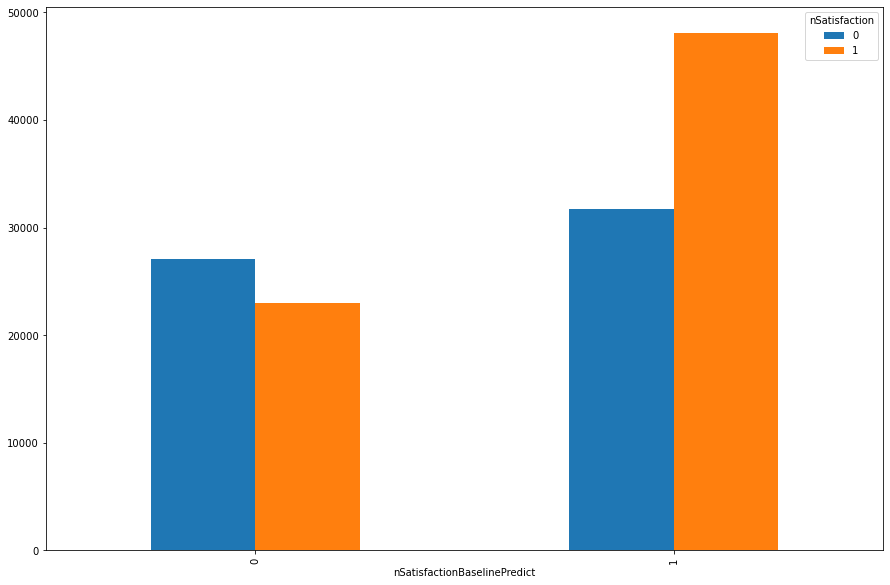

In [7]:
#De esta manera estamos haciendo el predict que hacemos en sklearn.
#invistico_Airline['nSatisfactionBaselinePredict'] = invistico_Airline.apply(lambda x: baseline_predict(x['Customer Type'], x['Type of Travel'], x['Class'], x['Gender']), axis=1)
invistico_Airline['nSatisfactionBaselinePredict'] = invistico_Airline.apply(lambda x: baseline_predict(x['Type of Travel'],
                                                                                                       x['Class'],
                                                                                                       x['Inflight entertainment'],
                                                                                                       x['Seat comfort']), axis=1)
#invistico_Airline['nSatisfactionBaselinePredict'] = invistico_Airline.apply(lambda x: baseline_predict(x['Type of Travel'], x['Class']), axis=1)
#invistico_Airline['nSatisfactionBaselinePredict'] = invistico_Airline.apply(lambda x: baseline_predict(x), axis=1)

invistico_Airline['predict_comparation'] = np.where(invistico_Airline.nSatisfaction == invistico_Airline.nSatisfactionBaselinePredict, True, False)

print(invistico_Airline['nSatisfaction'].value_counts())
print(invistico_Airline['nSatisfactionBaselinePredict'].value_counts())
print(invistico_Airline['predict_comparation'].value_counts())

grouped_gender = invistico_Airline.groupby(['nSatisfaction', 'nSatisfactionBaselinePredict']).count()['Age']
print(grouped_gender.unstack(level=0))
(grouped_gender.unstack(level=0).plot.bar(figsize=(15, 10)))
plt.show()

#### Comentario intermedio del desarrollo

A este punto del notebook se cuenta también con la variable objetivo definida como la linea base:
- Gráfico de barras con varias características del dataset que sirve para desarrollar la función que servirá para establecer la línea base a utilizar
- Función **baseline_predict**: Recibe los parámetros siguientes: Customer Type, Type of Travel, Class, Gender y establece que:
    - Los pasajeros frecuentes en viaje personal que utilizan clase económica masculinos están insatisfechos.
    - Los pasajeros que viajan por negocios en clase económica están insatisfechos.
    - El resto esta satisfecho
- **y_baseline_predict** = Se utiliza la nueva columna nSatisfactionBaselinePredict (Variable objetivo de la línea base)

-----------------------
## Separación de conjuntos de datos en entrenamiento y evaluación

In [8]:
# creamos lista de features
feature_cols = ['nGender', 'nCustomerType', 'Age', 'nTypeOfTravel','nClass', 'Flight Distance', 'Seat comfort' 
                , 'Departure/Arrival time convenient', 'Food and drink', 'Gate location','Inflight wifi service', 'Inflight entertainment'
                , 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service'
                , 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

#feature_cols = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location','Inflight wifi service', 'Inflight entertainment'
#                , 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service'
#                , 'Cleanliness', 'Online boarding']

In [9]:
# creamos nuevamente X e y
X = invistico_Airline[feature_cols]
#y = invistico_Airline.nSatisfactionBaselinePredict
y = invistico_Airline.nSatisfaction

In [10]:
# Definimos X e y para el set de entrenemiento y el de test
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=319)

#En este punto tenemos y (original), y_train, y_test e y_baseline_predict (predict) para calcular las métricas y comparar los modelos.
y_baseline_predict = invistico_Airline.filter(items = y_test.index, axis=0)['nSatisfactionBaselinePredict']



In [11]:
print('X_train.shape =', X_train.shape)
print('X_test.shape =', X_test.shape)
print('y_train.shape =', y_train.shape)
print('y_test.shape =', y_test.shape)
print('y_baseline_predict.shape =', y_baseline_predict.shape)

X_train.shape = (87019, 22)
X_test.shape = (42861, 22)
y_train.shape = (87019,)
y_test.shape = (42861,)
y_baseline_predict.shape = (42861,)


#### Comentario intermedio del desarrollo

A este punto del notebook se cuenta con los conjuntos de datos de entrenamiento y test. Se puede observar que:
- X = Se utilizan todas las características del dataset con la salvedad de que las columnas categóricas se reemplazan por las nuevas columnas númericas correspondientes; a saber: Gender --> nGender, Customer Type --> nCustomerType, Type of Travel --> nTypeOfTravel y Class --> nClass.  (22 variables). El conjuto de features incluidos en X se los puede llamar ***Preditores***
- y = Se utiliza la característica nSatisfaction que reemplaza a satisfaction que también es categórica (Variable objetivo o ***Target***)
- Se observa que el tamaño del conjunto de test es 0.33
- De los tres tipos de separación en *train* y *test* que vimos
    - Validation Set (Hold-Out): En este enfoque mezclamos el dataset y utilizamos la mitad para entrenar y la otra mitad como set de validación
    - Leave One Out Cross Validation (LOOCV): Este enfoque consiste en dejar afuera una observación la cual se usará para testear y utilizar el resto para poder entrenar
    - K-Fold Cross Validation: Este enfoque consiste en separar el dataset en K-Folds y entrenar *K* veces el modelo utilizando *Ki* como set de validación
    
    Utilizamos ***Validation Set (Hold-Out)***

-----------------------
## Entrenamiento y evaluación de al menos un modelo de Machine Learning.

### Evaluación

In [ ]:
#Creación de objeto para separacion de observaciones de train
cv = KFold(n_splits=3, random_state=319, shuffle=True)

In [ ]:
def evaluar_rendimiento(varModelo, varXTrain, varYTrain, varCV, varScoring, varNombre):
    #s = cross_val_score(varModelo, varXTrain, varYTrain, cv=varCV, n_jobs=-1,scoring='precision')
    cross_vs = cross_val_score(varModelo, varXTrain, varYTrain, cv=varCV, n_jobs=-1,scoring=varScoring)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format(varNombre, cross_vs.mean().round(3), cross_vs.std().round(3)))

In [ ]:
clf = LogisticRegression(C=1e10)
dt = DecisionTreeClassifier(class_weight='balanced')
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced',)
et = ExtraTreesClassifier(class_weight='balanced')
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()
#svc = SVC()

evaluar_rendimiento(clf, X_train, y_train, cv, "precision", "Regresión Lógistica")
evaluar_rendimiento(dt, X_train, y_train, cv, "precision", "Árbol de decisión")
evaluar_rendimiento(bdt, X_train, y_train, cv, "precision", "Bagging AD")
evaluar_rendimiento(rf, X_train, y_train, cv, "precision", "Random Forest")
evaluar_rendimiento(et, X_train, y_train, cv, "precision", "Extra Trees")
evaluar_rendimiento(ab, X_train, y_train, cv, "precision", "AdaBoostClassifier")
evaluar_rendimiento(gb, X_train, y_train, cv, "precision", "GradientBoostingClassifier")
#evaluar_rendimiento(svc, X_train, y_train, cv, "precision", "Support Vector Machines")

#classifiers = [clf, dt, bdt, rf, et, ab, gb, svc]
classifiers = [clf, dt, bdt, rf, et, ab, gb]

In [ ]:
classifiers

#### Comentario intermedio del desarrollo

A este punto del notebook se cuenta con la evaluación de rendimiento de los modelos: 
- Regresión Lógistica
- Árbol de decisión
- Bagging AD
- Random Forest
- Extra Trees
- Ada Boost
- Gradient Boosting

Como tipo de separador de los conjuntos de *train* y *test* usamos: ***K-Fold Cross Validation*** para la evaluación de los modelos.

Con el resultado observado en primer instancia se tomará el modelo **Random Forest** para entrenamiento y evaluación de métricas dado que esuno de los que mayor rendimiento se observa 0.965 ± 0.001

### Entrenamiento
Se utiliza el modelo mejor evaluado anteriormente ***Random Forest***

#### Proporción de la clase
Cantidad de personas satisfechas o insatisfechas

In [ ]:
invistico_Airline.nSatisfaction.value_counts(normalize=True).round(2)

In [ ]:
sns.countplot(invistico_Airline.nSatisfaction)
plt.title('Proporción de la clase')

#### Proporción de la clase en la línea base
Cantidad de personas satisfechas o insatisfechas

In [ ]:
invistico_Airline.nSatisfactionBaselinePredict.value_counts(normalize=True).round(2)

In [ ]:
sns.countplot(invistico_Airline.nSatisfactionBaselinePredict)
plt.title('Proporción de la clase en la línea base')

#### Modelo: RandomForestClassifier

In [ ]:
def fn_classification_report_to_dataframe(vClassifierName, vReport):
    report_data = []
    lines = vReport.split('\n').replace("'", "")
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['classifier'] = vClassifierName
        row['class'] = row_data[0]
        row['precision'] = row_data[1]
        #row['recall'] = row_data[2]
        #row['f1_score'] = row_data[3]
        #row['support'] = row_data[4]
        report_data.append(row)
    return pd.DataFrame.from_dict(report_data)

In [ ]:
#rf = RandomForestClassifier(class_weight='balanced')
#rf.fit(X_train,y_train)

for cls in classifiers:
    cls.fit(X_train, y_train)

In [ ]:
confusion = confusion_matrix(y_test, y_baseline_predict)
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Matriz de confusión entre y_test e y_baseline predict", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

vReport = metrics.classification_report(y_test, y_baseline_predict, digits = 4, output_dict=True)
df_baseline_report = pd.DataFrame.from_dict(vReport)
df_baseline_report['Classifiers'] = 'Línea Base' 
df_baseline_report.sort_index(axis=1, inplace=True)
df_baseline_report.reset_index(inplace=True)
df_baseline_report = df_baseline_report.rename(columns = {'index':'Metrics', '0':'dissatisfied', '1':'satisfied'})
df_baseline_report.sort_values(by=['Metrics', 'Classifiers'])

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,6))
title = fig.suptitle("Matrices de confusión entre y_test e y_predict", fontsize=14)

# define labels
#l = ["0=dissatisfied", "1=satisfied"]
df_reportes = []

for cls, ax in zip(classifiers, axes.flatten()):
    y_predict = cls.predict(X_test)
    confusion = confusion_matrix(y_test, y_predict)
    sns.heatmap(confusion,annot=True,fmt='g', ax=ax)
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    ax.title.set_text(type(cls).__name__)
    #print(type(cls).__name__)    
    #print(metrics.classification_report(y_test, y_predict, digits = 4))    

    vReport = metrics.classification_report(y_test, y_predict, digits = 4, output_dict=True)
    df_report = pd.DataFrame.from_dict(vReport)
    df_report['Classifiers'] = type(cls).__name__ 
    
    df_report = df_report.rename(columns = {'index':'Metrics', '0':'dissatisfied', '1':'satisfied'})
    df_reportes.append(df_report)
    
   
plt.tight_layout()  
plt.show()

df_resultado = pd.concat(df_reportes)
df_resultado.sort_index(axis=1, inplace=True)
df_resultado.reset_index(inplace=True)
df_resultado = df_resultado.rename(columns = {'index':'Metrics', '0':'dissatisfied', '1':'satisfied'})
df_resultado.sort_values(by=['satisfied', 'Metrics'], ascending = [False, True])

In [ ]:
importancias = rf.feature_importances_
print (all(importancias == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)))
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importancias)[::-1]
nombres_features = X.columns

# Graficar la importancia de los features en el random forest
plt.figure()
plt.title("Importancia de los features en RandomForest")
plt.bar(range(X.shape[1]), importancias[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), nombres_features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Predicciones del modelo entrenado

In [ ]:
y_predict = modelo.predict(X_train)
print("y_predict con modelo Random Forest y X_train. Métricas entre y_train e y_predict (Debe ser 1.0)")
print("* accuracy_score=", accuracy_score(y_train, y_predict).round(4))
print("* recall_score=", recall_score(y_train, y_predict).round(4))
print("* precision_score=", precision_score(y_train, y_predict).round(4))

In [ ]:
y_predict = modelo.predict(X_test)
print("y_rpredict con modelo Random Forest y X_test. Métricas entre y_test e y_predict")
print("* accuracy_score=", accuracy_score(y_test, y_predict).round(4))
print("* recall_score=", recall_score(y_test, y_predict).round(4))
print("* precision_score=", precision_score(y_test, y_predict).round(4))

In [ ]:
print("Desde la linea base y X_test. Métricas entre y_test e y_baseline_predict")
print("* accuracy_score=", accuracy_score(y_test, y_baseline_predict).round(4))
print("* recall_score=", recall_score(y_test, y_baseline_predict).round(4))
print("* precision_score=", precision_score(y_test, y_baseline_predict).round(4))

In [ ]:
#roc_curve(y_train, y_predict) CONSULTAR
#auc(y_train, y_predict) CONSULTAR

In [ ]:
np.array(y_test)

In [ ]:
y_predict

In [ ]:
np.array(y_baseline_predict)

#### ¿Donde falla mi modelo?

Ver la contingencia
- Clasificación: Matriz de confusión
- Regresión: Un plot

#### Sobre y_test e y_predict

In [ ]:
confusion = confusion_matrix(y_test, y_predict)

fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Matriz de confusión entre y_test e y_predict", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

sns.heatmap(confusion,annot=True,fmt='g')
plt.show()
print(metrics.classification_report(y_test, y_predict, digits = 4))

#### Sobre y_test e y_baseline_predict

In [ ]:
confusion = confusion_matrix(y_test, y_baseline_predict)

fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Matriz de confusión entre y_test e y_baseline predict", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

sns.heatmap(confusion,annot=True,fmt='g')
plt.show()
print(metrics.classification_report(y_test, y_baseline_predict, digits = 4))

#### Comentario intermedio del desarrollo

A este punto del notebook se entreno un modelo ***Random Forest***
- Se utiliza el conjunto de datos de entrenamiento X_Train (Predictores de entrenamiento) e y_train (variable objetivo de entrenamiento)
- Se calculan las métricas entre y_train e y_predict y el resultado debe ser 1.0 porque los predictores de entrenamiento (X_Train) tienen y_train como variable objetivo
- Se calculan las métricas entre y_test e y_predict y se puede observar el resultado de cada métrica

Cabe señalar que cada métrica utilizada: accuracy_score, recall_score, precision_score -existen otras-, recibe como parámetros *y_true* e *y_pred* -en ese orden- por lo tanto siempre se debe enviar la variable objetivo con valores verdaderos -*y_test* por ejemplo- primero y luego la variable objetivo con valores predecidos -*y_pred*-.

Por otra parte, se observa de los array de y_test e y_predict lo siguiente:
- y_test es lo verdadero, la variable objetivo correcta
- y_predict es lo predecido, la variable objetivo predecida 

por lo tanto se puede dar los siguientes casos:
- **True positive**: Cuando la observacion de la variable objetivo correcta es true -1- y la predicha también es true -1-
>- np.array(y_test) = array([**1**, 1, 1, ..., 0, 1, 0], dtype=int64)
>-y_predict        = array([**1**, 1, 1, ..., 1, 0, 0], dtype=int64)

- **True negative**: Cuando la observacion de la variable objetivo correcta es true -1- y la predicha es false -0-
>- np.array(y_test) = array([1, 1, 1, ..., 0, **1**, 0], dtype=int64)
>-y_predict        = array([1, 1, 1, ..., 1, **0**, 0], dtype=int64)

- **False positive**: Cuando la observacion de la variable objetivo correcta es false -0- y la predicha también es false -0-
>- np.array(y_test) = array([1, 1, 1, ..., 0, 1, **0**], dtype=int64)
>-y_predict        = array([1, 1, 1, ..., 1, 0, **0**], dtype=int64)

- **False negative**: Cuando la observacion de la variable objetivo correcta es false -0- y la predicha es positiva -1-
>- np.array(y_test) = array([1, 1, 1, ..., **0**, 1, 0], dtype=int64)
>-y_predict        = array([1, 1, 1, ..., **1**, 0, 0], dtype=int64)


**Comentario de Alejandro en Video Clase del día 02 jun 2022 - Sección 2.2 Métricas: Accuracy**
>Es decir, que en este caso, encontramos que el 76% de los casos -en el set de test- han sido correctamente clasificados.
Ahora bien, ¿Qué tan bueno es el clasificador? ¿Qué significa que podamos clasificar correctamente a esta proporción de casos?
Una primera forma de comenzar a responder esta pregunta es comprara la performance con un clsificador bien simple y (casi) trivial:
se lo suele llamar "clasificador nulo" y consiste simplemente en predecir solamente teniendo en cuenta la clase mas frecuente.

>Observaciones importantes expresadas verbalmente: 
>- Desconfiar de la métrica "Accuracy" cuando la información de la variable objetivo -target- está muy desbalanceada -***Ver Sección Proporción de la Clase***-.
>- AUC entre 0.7 y 0.8 está bien
>- Matriz de confusión -***Ver imágen debajo***-.
>- **Métricas computadas desde la matriz de confusión: Sensitivity (o recall)**: Mide la capacidad -qué tan "sensible" es del modelo- de detectar los verdaderos positivos (TP) sobre todos los casos que son positivos (FN + TP). En nuestro TP: del total de personas satisfechas, ¿Cuántas logra clasificar correctamente el modelo?

-----------------------
## GridSearchCV

In [ ]:
#model_params = {
#    'logistic_regression' : {
#        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#        'params': {
#            'C': [1,5,10]
#        }
#    },
#    'decision_tree': {
#        'model': DecisionTreeClassifier(),
#        'params' : {
#            'criterion':['gini','entropy'],
#            'max_depth': np.arange(3, 15)
#        }            
#    },
#    'bagging': {
#        'model': BaggingClassifier(DecisionTreeClassifier()),
#        'params' : {
#            "base_estimator__max_depth": [3,5,10,20],
#            "base_estimator__max_features": [None, "auto"],
#            "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
#            "base_estimator__min_samples_split": [2, 5, 7],
#            'bootstrap_features': [False, True],
#            'max_features': [0.5, 0.7, 1.0],
#            'max_samples': [0.5, 0.7, 1.0],
#            'n_estimators': [2, 5, 10, 20],
#        }
#    },    
#    'random_forest': {
#        'model': RandomForestClassifier(class_weight='balanced',),
#        'params' : {
#            'n_estimators': [1,5,10]
#        }
#    },
#    'extra_tree': {
#        'model': ExtraTreesClassifier(class_weight='balanced'),
#        'params' : {
#            "model__random_state": [0, 1, 2, 3, 4],
#            "model__n_estimators": [320, 340, 360, 380, 400],
#            "model__max_depth": [25, 30, 32, 34, 38, 45]
#        }        
#    }
#}

#params1 = {
#    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
#    'RandomForestClassifier': { 'n_estimators': [16, 32] },
#    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
#    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
#    'SVC': [
#        {'kernel': ['linear'], 'C': [1, 10]},
#        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
#    ]
#}


In [15]:
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion':['gini','entropy'],
            'max_depth': [5, 10, 20]
        }            
    },
    'random_forest': {
        'model': RandomForestClassifier(class_weight='balanced',),
        'params' : {
            'n_estimators': [5,10, 20]
        }
    },
    'extra_tree': {
        'model': ExtraTreesClassifier(class_weight='balanced'),
        'params' : {
            'n_estimators': [5, 10, 20]
        }        
    },
    'ada_boost': {
        'model': AdaBoostClassifier(),
        'params' : {
            'n_estimators': [5, 10, 20]
        }        
    },
    'gradient_boosting': {
        'model': GradientBoostingClassifier(),
        'params' : {
            'n_estimators': [5, 10, 20],
            'learning_rate': [0.8, 1.0] 
        }        
    }    
}

In [17]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, scoring='recall', return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    print('model:', model_name)
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model: logistic_regression
model: decision_tree
model: random_forest
model: extra_tree
model: ada_boost
model: gradient_boosting


,model,best_score,best_params
0,logistic_regression,0.847508,{'C': 5}
1,decision_tree,0.931774,"{'criterion': 'entropy', 'max_depth': 10}"
2,random_forest,0.942805,{'n_estimators': 5}
3,extra_tree,0.944047,{'n_estimators': 5}
4,ada_boost,0.872832,{'n_estimators': 10}
5,gradient_boosting,0.923943,"{'learning_rate': 1.0, 'n_estimators': 10}"


#### Comentario intermedio del desarrollo

A este punto del notebook, de la aplicación del GridSearchCV, para la métrica "recall" -sensibilidad-, se observa que el mejor clasificador es ***ExtraTreesClassifier*** y con los siguientes parámetros: ***{'n_estimators': 5}***